In [17]:
import pandas as pd
df = pd.read_csv('clean_player_data.csv', index_col=0)
df

,Player Name,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,FTA_5_ago,av_5_FTA,FT%_1_ago,FT%_2_ago,FT%_3_ago,FT%_4_ago,FT%_5_ago,av_5_FT%,next_home,target
0,A.J. Green,2.0,2.0,1.000,2.0,2.0,1.000,1.0,1.0,1.000,...,1.0,1.0,1.000,1.000,1.000,1.000,1.000,1.0,1,0.0
1,A.J. Green,0.0,4.0,0.000,0.0,3.0,0.000,0.0,0.0,0.000,...,0.0,0.0,1.000,0.000,0.000,0.000,0.000,0.0,0,2.0
2,A.J. Green,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.000,1.000,0.000,0.000,0.000,0.0,0,3.0
3,A.J. Green,1.0,3.0,0.333,1.0,3.0,0.333,0.0,0.0,0.000,...,0.0,0.0,0.000,0.000,1.000,0.000,0.000,0.0,0,0.0
4,A.J. Green,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,0.000,...,0.0,0.0,0.000,0.000,0.000,1.000,0.000,0.0,0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28936,Zion Williamson,7.0,18.0,0.389,0.0,0.0,0.000,8.0,9.0,0.889,...,16.0,11.0,0.875,0.250,0.769,0.500,0.625,1.0,0,31.0
28937,Zion Williamson,13.0,21.0,0.619,0.0,1.0,0.000,5.0,5.0,1.000,...,14.0,10.0,0.889,0.875,0.250,0.769,0.500,1.0,0,26.0
28938,Zion Williamson,11.0,26.0,0.423,1.0,2.0,0.500,3.0,6.0,0.500,...,13.0,8.0,1.000,0.889,0.875,0.250,0.769,1.0,1,12.0
28939,Zion Williamson,4.0,13.0,0.308,0.0,1.0,0.000,4.0,5.0,0.800,...,4.0,6.0,0.500,1.000,0.889,0.875,0.250,1.0,1,40.0


In [18]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier

rr = RidgeClassifier(alpha=1)
split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(rr, n_features_to_select=30, direction='forward', cv=split)

In [19]:
removed_columns = ['season', 'date', 'team', 'target', 'team_opp', 'Player Name']
selected_columns = df.columns[~df.columns.isin(removed_columns)]

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [21]:
sfs.fit(df[selected_columns], df['target'])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=30)

In [22]:
predictors = list(selected_columns[sfs.get_support()])
predictors

['FTA',
 'TRB',
 'PF',
 'MP',
 'TS%',
 'eFG%',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'DRtg',
 'BPM',
 'highest_scoring_teammate',
 'PTS_2_ago',
 'FG_2_ago',
 'FG_4_ago',
 'FGA_1_ago',
 'FGA_3_ago',
 'FG%_1_ago',
 'FG%_3_ago',
 'FG%_4_ago',
 '3P_3_ago',
 '3P%_3_ago',
 'av_5_3P%',
 'FT_1_ago',
 'FTA_1_ago',
 'FT%_1_ago',
 'FT%_3_ago',
 'FT%_4_ago']

In [23]:
rr.fit(df[predictors], df['target'])
preds = rr.predict(df[predictors])
preds = pd.Series(preds, index=df.index)
combined = pd.concat([df['target'],preds],axis=1)
combined.columns = ['actual', 'prediction']
predictions = combined

In [24]:
df.tail(10)

,Player Name,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,FTA_5_ago,av_5_FTA,FT%_1_ago,FT%_2_ago,FT%_3_ago,FT%_4_ago,FT%_5_ago,av_5_FT%,next_home,target
28931,Zion Williamson,0.36,0.319149,0.600,0.000000,0.000000,0.0,0.416667,0.50000,0.625,...,0.18750,0.411765,0.900,0.714,0.000,0.667,1.000,1.0,0.5,25.0
28932,Zion Williamson,0.36,0.361702,0.529,0.000000,0.000000,0.0,0.291667,0.43750,0.500,...,0.18750,0.529412,0.625,0.900,0.714,0.000,0.667,1.0,0.5,30.0
28933,Zion Williamson,0.40,0.425532,0.500,0.000000,0.000000,0.0,0.416667,0.40625,0.769,...,0.00000,0.647059,0.500,0.625,0.900,0.714,0.000,1.0,0.5,15.0
28934,Zion Williamson,0.28,0.340426,0.438,0.000000,0.000000,0.0,0.041667,0.12500,0.250,...,0.43750,0.764706,0.769,0.500,0.625,0.900,0.714,1.0,0.0,29.0
28935,Zion Williamson,0.44,0.446809,0.524,0.000000,0.000000,0.0,0.291667,0.25000,0.875,...,0.31250,0.647059,0.250,0.769,0.500,0.625,0.900,1.0,0.0,22.0
28936,Zion Williamson,0.28,0.382979,0.389,0.000000,0.000000,0.0,0.333333,0.28125,0.889,...,0.50000,0.647059,0.875,0.250,0.769,0.500,0.625,1.0,0.0,31.0
28937,Zion Williamson,0.52,0.446809,0.619,0.000000,0.043478,0.0,0.208333,0.15625,1.000,...,0.43750,0.588235,0.889,0.875,0.250,0.769,0.500,1.0,0.0,26.0
28938,Zion Williamson,0.44,0.553191,0.423,0.083333,0.086957,0.5,0.125000,0.18750,0.500,...,0.40625,0.470588,1.000,0.889,0.875,0.250,0.769,1.0,0.5,12.0
28939,Zion Williamson,0.16,0.276596,0.308,0.000000,0.043478,0.0,0.166667,0.15625,0.800,...,0.12500,0.352941,0.500,1.000,0.889,0.875,0.250,1.0,0.5,40.0
28940,Zion Williamson,0.68,0.574468,0.630,0.000000,0.043478,0.0,0.250000,0.28125,0.667,...,0.25000,0.411765,0.800,0.500,1.000,0.889,0.875,1.0,1.0,22.0


In [25]:
predictions.tail(11)

,actual,prediction
28930,28.0,15.0
28931,25.0,0.0
28932,30.0,22.0
28933,15.0,22.0
28934,29.0,28.0
28935,22.0,14.0
28936,31.0,21.0
28937,26.0,26.0
28938,12.0,16.0
28939,40.0,20.0


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions['actual'], predictions['prediction'])

0.15497045713693375

In [27]:
def within_n(predictions_df, n):
    counter = 0
    for index, row in predictions_df.iterrows():
        actual_value = row['actual']
        predicted_value = row['prediction']
        if abs(predicted_value - actual_value) <= n:
            counter += 1
    return counter / 28941

In [28]:
accuracy_list = []
n_values = range(0, 11)

for i in n_values:
    score = within_n(predictions, i)
    accuracy_list.append(score)
    print (i,': ',score)

0 :  0.15497045713693375
1 :  0.19094018865968695
2 :  0.2864448360457482
3 :  0.35769323796689817
4 :  0.42427697729864206
5 :  0.4886147679762275
6 :  0.5550257420268823
7 :  0.6054386510486852
8 :  0.6589613351300923
9 :  0.7036729898759545
10 :  0.745240316505995


In [29]:
accuracy_df = pd.DataFrame({'accuracy': accuracy_list})
accuracy_df.reset_index(drop=True)

,accuracy
0,0.154970
1,0.190940
2,0.286445
3,0.357693
4,0.424277
5,0.488615
6,0.555026
7,0.605439
8,0.658961
9,0.703673


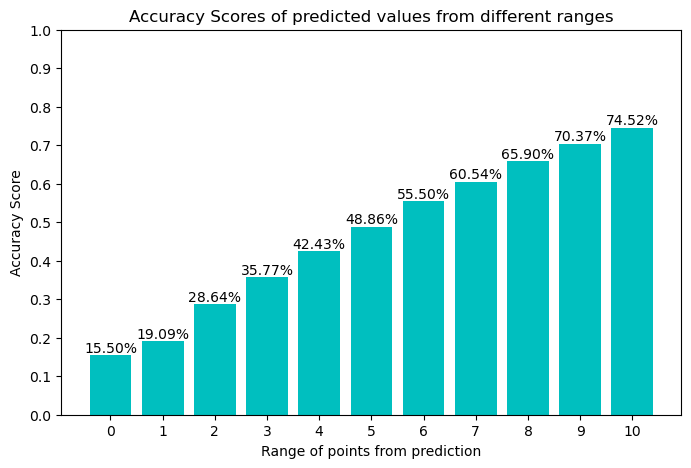

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
bars = plt.bar(n_values, accuracy_list, color='c')

plt.title('Accuracy Scores of predicted values from different ranges')
plt.xlabel('Range of points from prediction')
plt.ylabel('Accuracy Score')
plt.xticks(n_values)
plt.yticks([i/10 for i in range(11)])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height * 100:.2f}%', ha='center', va='bottom')

plt.show()